## Kelompok 1

Anggota Kelompok :

Muhammad Fadlul Hafiizh \(2209889\)

Franklin Impianro Turnip \(2203211\)

Roshan Syalwan Nurilham \(2203142\)

Muhammad Iqbal Fadhilah (2202292)

Abdullah Hafidz Furqon (2202729)

Thariq

#### Informasi terkait data

Data yang digunakan adalah NPL \(Non Performing Loan\) yang diantaranya memeliki atribut sebagai berikut:

x : id costumer

jumlah\_kartu     : jumlah kartu kredit yang dimiliki

outstanding       : nilai transaksi yang belum terbayarkan

limit\_kredit        : nilai limit transaksi kartu kredit

tagihan             : 
nilai tagihan yang harus dibayarkan setiap siklus penagihan kartu kredit

total\_pemakaian\_tunai: Total uang tunai yang ditarik dari kartu kredit.

total\_pemakaian\_retail: Total penggunaan kartu kredit untuk transaksi ritel.

sisa\_tagihan\_tidak\_terbayar : Jumlah tagihan yang belum dibayar oleh nasabah dari periode sebelumnya.

kode\_cabang: Kode yang mewakili cabang dari lembaga keuangan.

rasio\_pembayaran: Rasio pembayaran tagihan terhadap tagihan total.

persentasi\_overlimit: Persentase penggunaan kartu kredit melebihi batas kredit.

rasio\_pembayaran\_3bulan: Rasio pembayaran tagihan selama tiga bulan terakhir.

rasio\_pembayaran\_6bulan: Rasio pembayaran tagihan selama enam bulan terakhir.

skor\_delikuensi: Skor yang mengindikasikan risiko kredit nasabah.

flag\_kredit\_macet: mengindikasikan apakah kredit nasabah akan macet \(0 untuk tidak macet dan 1 untuk macet\).

jumlah\_tahun\_sejak\_pembukaan\_kredit: Jumlah tahun sejak nasabah membuka kredit.

total\_pemakaian: Total penggunaan kartu kredit \(termasuk tunai dan ritel\).

sisa\_tagihan\_per\_jumlah\_kartu: Rata\-rata sisa tagihan per jumlah kartu kredit.

sisa\_tagihan\_per\_limit: Rata\-rata sisa tagihan per batas kredit.

total\_pemakaian\_per\_limit: Rata\-rata total pemakaian per batas kredit.

pemakaian\_3bln\_per\_limit: Rata\-rata pemakaian dalam tiga bulan terakhir per batas kredit.

pemakaian\_6bln\_per\_limit: Rata\-rata pemakaian dalam enam bulan terakhir per batas kredit.

utilisasi\_3bulan: Persentase pemakaian dalam tiga bulan terakhir.

utilisasi\_6bulan: Persentase pemakaian dalam enam bulan terakhir.

Dan konteks data yang akan kita prediksi adalah nasabah yang kemungkinan kreditnya akan macet atau gagal.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("npl_train.txt")


In [3]:
df.head(10)

X  jumlah_kartu  outstanding  limit_kredit    tagihan  \
0   1             2        36158     7000000.0    23437.0   
1   2             2       268691    10000000.0   254564.0   
2   3             3      6769149    28000000.0  4159779.0   
3   4             4      3496732    21000000.0   111231.0   
4   5             2      9402085    10000000.0  6099283.0   
5   6             2      6227439    80000000.0  2081248.0   
6   7             2      3906290     4000000.0  2043682.0   
7   8             4      9534837    20000000.0  3692028.0   
8   9             2      4145065     5000000.0  4021399.0   
9  10             4      1818606     7000000.0  1765911.0   

   total_pemakaian_tunai  total_pemakaian_retail  sisa_tagihan_tidak_terbayar  \
0                    0.0                    94.0                      26323.0   
1                    0.0                  1012.0                          0.0   
2                    0.0                     0.0                          0.0   
3                    0.0               2536660.0                     581334.0   
4                    0.0               2666558.0                    5951865.0   
5                    0.0               3690250.0                    4613435.0   
6                    0.0                230400.0                    3314046.0   
7                    0.0               9327612.0                    7881069.0   
8                    0.0                335680.0                    4122425.0   
9                    0.0                     0.0                    1627786.0   

  kode_cabang  rasio_pembayaran  ...  flag_kredit_macet  \
0           I            102.19  ...                  0   
1           A              0.00  ...                  0   
2           A            100.00  ...                  0   
3           G            100.00  ...                  0   
4           A             95.99  ...                  0   
5           A              0.00  ...                  0   
6           A             18.47  ...                  0   
7           A             58.55  ...                  0   
8           B             15.24  ...                  0   
9           A            100.00  ...                  0   

   jumlah_tahun_sejak_pembukaan_kredit  total_pemakaian  \
0                            15.416667             94.0   
1                             0.750000           1012.0   
2                            10.750000              0.0   
3                            19.750000        2536660.0   
4                             1.666667        2666558.0   
5                            10.250000        3690250.0   
6                             4.666667         230400.0   
7                             0.750000        9327612.0   
8                             5.666667         335680.0   
9                             8.500000              0.0   

   sisa_tagihan_per_jumlah_kartu  sisa_tagihan_per_limit  \
0                       13161.50                0.003760   
1                           0.00                0.000000   
2                           0.00                0.000000   
3                      145333.50                0.027683   
4                     2975932.50                0.595186   
5                     2306717.50                0.057668   
6                     1657023.00                0.828511   
7                     1970267.25                0.394053   
8                     2061212.50                0.824485   
9                      406946.50                0.232541   

   total_pemakaian_per_limit  pemakaian_3bln_per_limit  \
0                   0.000013                  0.011719   
1                   0.000101                  0.000000   
2                   0.000000                  0.040518   
3                   0.120793                  0.055971   
4                   0.266656                  0.323027   
5                   0.046128                  0.017184   
6                   0.057600                  0.018750   
7              

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

In [5]:
df.isnull().sum()

X                                        0
jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6

In [6]:
df.tagihan.describe()
#mean 8jt
#max 628jt

count    1.549300e+04
mean     8.078663e+06
std      1.761286e+07
min      2.004300e+04
25%      8.182500e+05
50%      3.145857e+06
75%      7.404991e+06
max      6.280000e+08
Name: tagihan, dtype: float64

In [7]:
df.skor_delikuensi.value_counts()

0    15451
1       29
2        4
4        4
5        3
3        2
Name: skor_delikuensi, dtype: int64

### Target Variable

target pada data ini adalah kolom flag\_kredit\_macet yang bertipe kategori 0 atau 1 \(true or false\), maka kita cek 



In [8]:
X = df.loc[:, df.columns != 'flag_kredit_macet']
y = df[['flag_kredit_macet']]
X.head(5)

X  jumlah_kartu  outstanding  limit_kredit    tagihan  \
0  1             2        36158     7000000.0    23437.0   
1  2             2       268691    10000000.0   254564.0   
2  3             3      6769149    28000000.0  4159779.0   
3  4             4      3496732    21000000.0   111231.0   
4  5             2      9402085    10000000.0  6099283.0   

   total_pemakaian_tunai  total_pemakaian_retail  sisa_tagihan_tidak_terbayar  \
0                    0.0                    94.0                      26323.0   
1                    0.0                  1012.0                          0.0   
2                    0.0                     0.0                          0.0   
3                    0.0               2536660.0                     581334.0   
4                    0.0               2666558.0                    5951865.0   

  kode_cabang  rasio_pembayaran  ...  skor_delikuensi  \
0           I            102.19  ...                0   
1           A              0.00  ...                0   
2           A            100.00  ...                0   
3           G            100.00  ...                0   
4           A             95.99  ...                0   

   jumlah_tahun_sejak_pembukaan_kredit  total_pemakaian  \
0                            15.416667             94.0   
1                             0.750000           1012.0   
2                            10.750000              0.0   
3                            19.750000        2536660.0   
4                             1.666667        2666558.0   

   sisa_tagihan_per_jumlah_kartu  sisa_tagihan_per_limit  \
0                        13161.5                0.003760   
1                            0.0                0.000000   
2                            0.0                0.000000   
3                       145333.5                0.027683   
4                      2975932.5                0.595186   

   total_pemakaian_per_limit  pemakaian_3bln_per_limit  \
0                   0.000013                  0.011719   
1                   0.000101                  0.000000   
2                   0.000000                  0.040518   
3                   0.120793                  0.055971   
4                   0.266656                  0.323027   

   pemakaian_6bln_per_limit  utilisasi_3bulan  utilisasi_6bulan  
0                  0.017810          0.013228          0.021949  
1                  0.000000          0.004232          0.000300  
2                  0.047703          0.249389          0.267853  
3                  0.016851          0.101912          0.346635  
4                  0.131162          0.707865          0.336571  

[5 rows x 23 columns]

In [9]:
print(y.shape)
print(X.shape)
y.head(2)

(15493, 1)
(15493, 23)


flag_kredit_macet
0                  0
1                  0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(y_train["flag_kredit_macet"].count())
y_train["flag_kredit_macet"].value_counts()

12394


0    11315
1     1079
Name: flag_kredit_macet, dtype: int64

Dari antara 12.394

kredit macet : 11.315

kredit lancar : 1.079


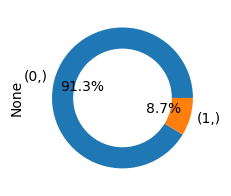

In [12]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

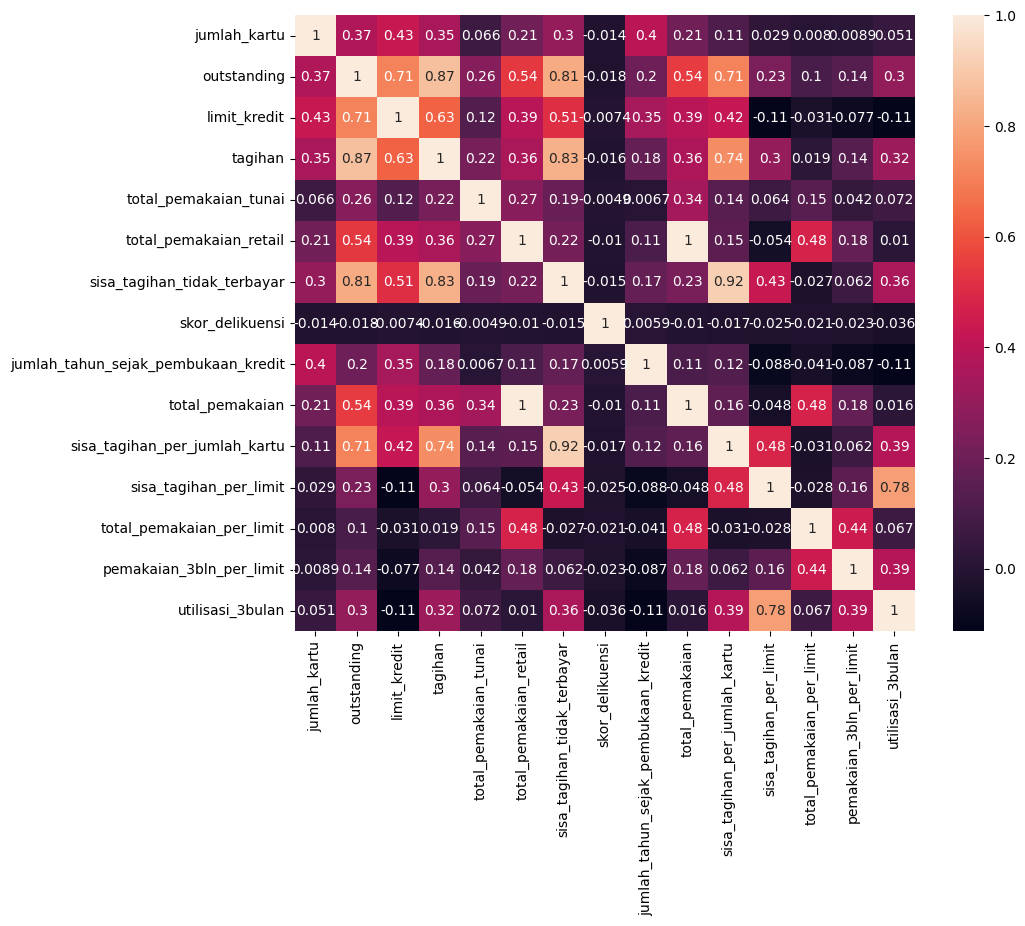

In [13]:
# heatmap
X_heatmap = X_train.drop(['X', 'kode_cabang', 'rasio_pembayaran', 'persentasi_overlimit',
                      'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'pemakaian_6bln_per_limit',
                      'utilisasi_6bulan'], axis = 1)
corr = X_heatmap.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

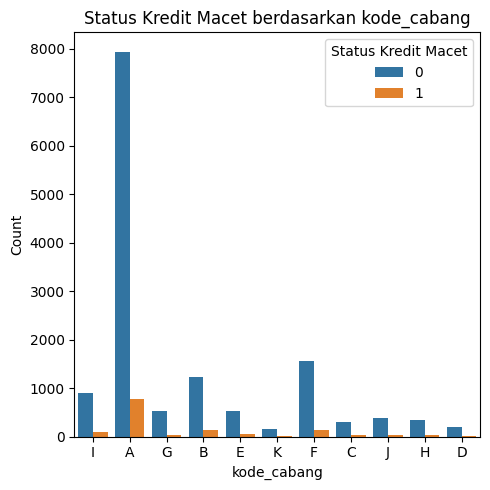

In [14]:
# independent variable
nominal_columns = ['kode_cabang']

fig, axes = plt.subplots(figsize=(5, 5))
for idx, cat_col in enumerate(nominal_columns):
    sns.countplot(x=cat_col, data=df, hue='flag_kredit_macet', ax=axes)
    axes.set_title(f'Status Kredit Macet berdasarkan {cat_col}')
    axes.set_xlabel(cat_col)
    axes.set_ylabel('Count')
    axes.legend(title='Status Kredit Macet')

plt.tight_layout()
plt.show()

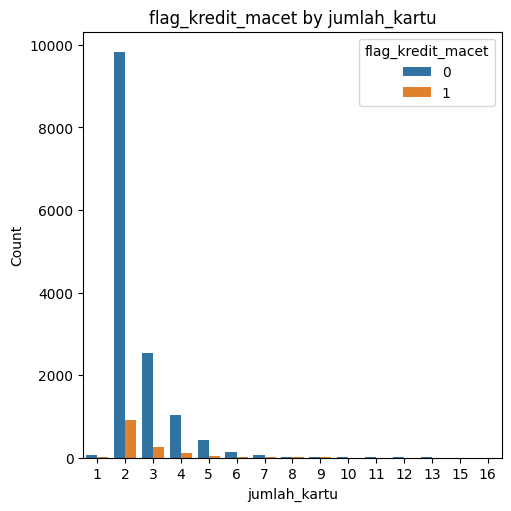

In [15]:
# ordinal variable
ordinal_columns = ['jumlah_kartu']

fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

for idx, cat_col in enumerate(ordinal_columns):
    sns.countplot(x=cat_col, data=df, hue="flag_kredit_macet", ax=axes)
    axes.set_title(f'flag_kredit_macet by {cat_col}')
    axes.set_xlabel(cat_col)
    axes.set_ylabel('Count')
    axes.legend(title='flag_kredit_macet')

plt.show()

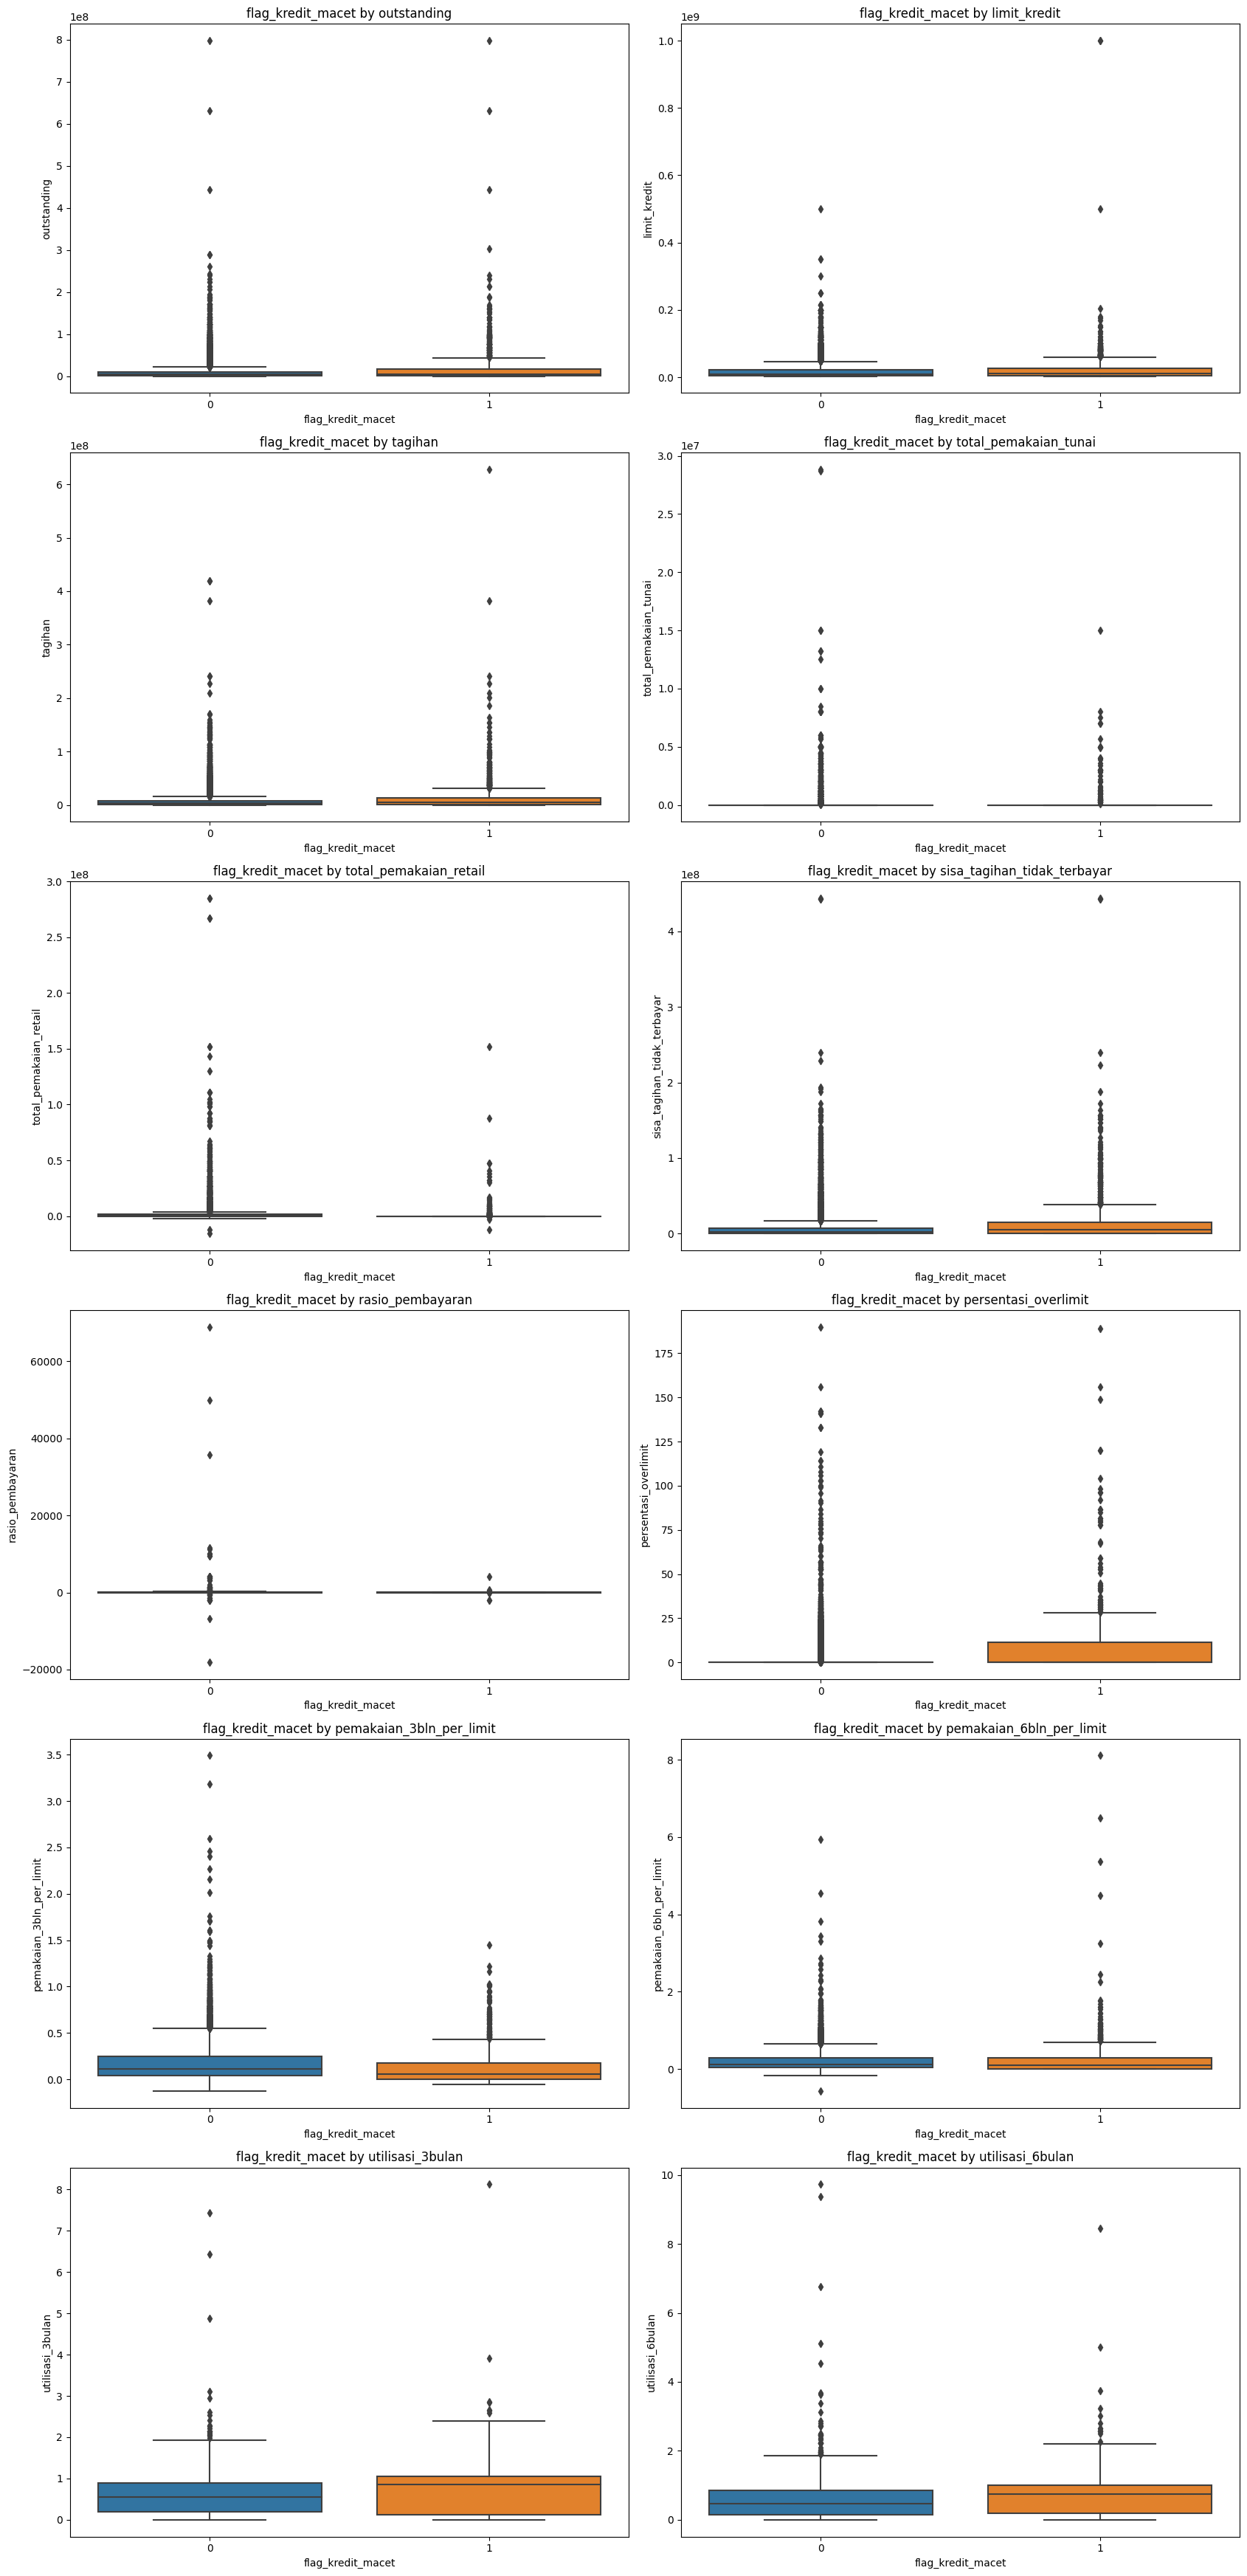

In [16]:
numeric_columns = ['outstanding','limit_kredit','tagihan', 'total_pemakaian_tunai','total_pemakaian_retail','sisa_tagihan_tidak_terbayar','rasio_pembayaran',
                   'persentasi_overlimit','pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit',
                   'utilisasi_3bulan', 'utilisasi_6bulan']

fig, axes = plt.subplots(len(numeric_columns) // 2, 2, figsize=(17, 35))
for idx, cat_col in enumerate(numeric_columns):
    row, col = idx // 2, idx % 2
    sns.boxplot(y=cat_col, data=df, x='flag_kredit_macet', ax=axes[row, col])
    axes[row, col].set_title(f'flag_kredit_macet by {cat_col}')
    axes[row, col].set_xlabel('flag_kredit_macet')
    axes[row, col].set_ylabel(cat_col)

plt.tight_layout()
plt.show()

In [17]:
X_train = pd.get_dummies(X_train, columns=['kode_cabang'])
X_test=pd.get_dummies(X_test)

In [18]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
X_train,y_train=over.fit_resample(X_train,y_train)

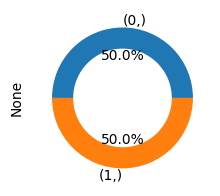

In [19]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_train = y_train["flag_kredit_macet"].ravel()
y_test = y_test["flag_kredit_macet"].ravel()
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(X_train, y_train)
pred_cv_forest=forest_model.predict(X_test)
score_forest = accuracy_score(pred_cv_forest,y_test)*100
print("akurasi:",score_forest)
print(classification_report(y_test, pred_cv_forest))

akurasi: 82.31687641174572
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2819
           1       0.29      0.67      0.41       280

    accuracy                           0.82      3099
   macro avg       0.63      0.75      0.65      3099
weighted avg       0.90      0.82      0.85      3099



Kolom "X" di drop karena tidak ada keterkaitan dengan dataset

In [21]:
X_train.drop('X', axis=1, inplace=True)
X_test.drop('X', axis=1, inplace=True)


In [22]:
X_train.head(5)

jumlah_kartu  outstanding  limit_kredit     tagihan  total_pemakaian_tunai  \
0             2      7768199     7000000.0   7758854.0                    0.0   
1             2     27388420    30000000.0  29748128.0                    0.0   
2             2      5659300     5000000.0   4819270.0                    0.0   
3             3      2903683     3000000.0   2773777.0                    0.0   
4             2      2690849     3000000.0    904655.0                    0.0   

   total_pemakaian_retail  sisa_tagihan_tidak_terbayar  rasio_pembayaran  \
0                     0.0                    7614428.0               0.0   
1                     0.0                   27182965.0               0.0   
2                     0.0                    4819270.0               0.0   
3                138860.0                    2876480.0               0.0   
4                411100.0                    1251795.0              97.1   

   persentasi_overlimit  rasio_pembayaran_3bulan  ...  kode_cabang_B  \
0                  11.0                     8.83  ...              0   
1                   0.0                    14.50  ...              0   
2                  13.5                    16.40  ...              0   
3                   0.0                    24.91  ...              0   
4                   0.0                   100.00  ...              0   

   kode_cabang_C  kode_cabang_D  kode_cabang_E  kode_cabang_F  kode_cabang_G  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   kode_cabang_H  kode_cabang_I  kode_cabang_J  kode_cabang_K  
0              0              0              0              0  
1              0              0              0              0  
2              1              0              0              0  
3              0              0              0              0  
4              0              1              0              0  

[5 rows x 32 columns]

In [23]:
print(X_test.shape)
print(X_train.shape)

(3099, 32)
(22630, 32)


Melakukan prediksi kembali untuk cek apakah aksi yang dilakukan berpengaruh pada akurasi

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Membuat dan melatih model RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1, max_depth=50, n_estimators=100)
forest_model.fit(X_train, y_train)

# Melakukan prediksi pada X_train
pred_cv_forest = forest_model.predict(X_test)

# Mengukur akurasi model
score_forest = accuracy_score(pred_cv_forest, y_test) * 100
print("Akurasi:", score_forest)
print(classification_report(y_test, pred_cv_forest))

Akurasi: 88.48015488867377
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2819
           1       0.36      0.36      0.36       280

    accuracy                           0.88      3099
   macro avg       0.65      0.65      0.65      3099
weighted avg       0.88      0.88      0.88      3099



In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22630 entries, 0 to 22629
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         22630 non-null  int64  
 1   outstanding                          22630 non-null  int64  
 2   limit_kredit                         22630 non-null  float64
 3   tagihan                              22630 non-null  float64
 4   total_pemakaian_tunai                22630 non-null  float64
 5   total_pemakaian_retail               22630 non-null  float64
 6   sisa_tagihan_tidak_terbayar          22630 non-null  float64
 7   rasio_pembayaran                     22630 non-null  float64
 8   persentasi_overlimit                 22630 non-null  float64
 9   rasio_pembayaran_3bulan              22630 non-null  float64
 10  rasio_pembayaran_6bulan              22630 non-null  float64
 11  skor_delikuensi             

Mengatasi data null dengan mengisi data null pada kolom 'kode_cabang' dengan modus

In [26]:
modus_train = X_train.iloc[:, 21:32].mode().iloc[0]
X_train.iloc[:, 21:32] = X_train.iloc[:, 21:32].fillna(modus_train)

modus_test = X_test.iloc[:, 21:32].mode().iloc[0]
X_test.iloc[:, 21:32] = X_test.iloc[:, 21:32].fillna(modus_test)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22630 entries, 0 to 22629
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         22630 non-null  int64  
 1   outstanding                          22630 non-null  int64  
 2   limit_kredit                         22630 non-null  float64
 3   tagihan                              22630 non-null  float64
 4   total_pemakaian_tunai                22630 non-null  float64
 5   total_pemakaian_retail               22630 non-null  float64
 6   sisa_tagihan_tidak_terbayar          22630 non-null  float64
 7   rasio_pembayaran                     22630 non-null  float64
 8   persentasi_overlimit                 22630 non-null  float64
 9   rasio_pembayaran_3bulan              22630 non-null  float64
 10  rasio_pembayaran_6bulan              22630 non-null  float64
 11  skor_delikuensi             

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Membuat dan melatih model RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1, max_depth=50, n_estimators=100)
forest_model.fit(X_train, y_train)

# Melakukan prediksi pada X_train
pred_cv_forest = forest_model.predict(X_test)

# Mengukur akurasi model
score_forest = accuracy_score(pred_cv_forest, y_test) * 100
print("Akurasi:", score_forest)
print(classification_report(y_test, pred_cv_forest))

Akurasi: 88.48015488867377
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2819
           1       0.36      0.36      0.36       280

    accuracy                           0.88      3099
   macro avg       0.65      0.65      0.65      3099
weighted avg       0.88      0.88      0.88      3099



In [29]:
#XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100,max_depth=40)
xgb_model.fit(X_train, y_train)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  89.51274604711197
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2819
           1       0.41      0.36      0.38       280

    accuracy                           0.90      3099
   macro avg       0.67      0.65      0.66      3099
weighted avg       0.89      0.90      0.89      3099



In [30]:
X_train.isnull().sum()

jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
kode_cabang_A                          0
kode_cabang_B                          0
kode_cabang_C                          0
kode_cabang_D   

#### Proses menghitung prediksi dari data yang telah di olah sebelumnya

In [35]:
#XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100,max_depth=40)
xgb_model.fit(X_train, y_train)
pred_xgb=xgb_model.predict(X_test)
# score_xgb = accuracy_score(pred_xgb,y_test)*100
# print("Akurasi : ", score_xgb)
# print(classification_report(y_test, pred_xgb))

print(pred_xgb)

[0 0 0 ... 0 1 0]


### Membandingkan hasil dari prediksi dan hasil asli dari data

In [39]:
# Memasukkan kolom baru yang merupakan hasil prediksi dan hasil tepatnya

X_cadangtes = X_test
X_cadangtes.head(10)

X_cadangtes["HasilPredict"] = pred_xgb
X_cadangtes["Hasil"] = y_test

In [43]:
# Mengecek isi dari data test (X_Test)

X_cadangtes.head(30)

jumlah_kartu  outstanding  limit_kredit     tagihan  \
2054              2      4381645     3000000.0   3746548.0   
7782              2      2033490     5000000.0   1655005.0   
13270             2        32192     7000000.0     42270.0   
3753              2      4703140     4000000.0   3910605.0   
11376             2     10200992    12000000.0  14000000.0   
884               2      8580236    10000000.0   7789627.0   
1373              2     17827799    20000000.0  10809701.0   
3154              4      1258764     7000000.0   1010357.0   
7731              3      5517084     3000000.0   5523273.0   
14335             2      3026152     3000000.0   3026152.0   
5865              2      2758165     3000000.0   1744696.0   
9185              2      1326931     7000000.0   1345099.0   
895               5     14169722    54000000.0  13721804.0   
3852              3       585240    21000000.0    297434.0   
339               3     36713758    81000000.0   7866386.0   
8526              2      3433801     6000000.0   1754038.0   
13452             2      2764663     6000000.0   1391981.0   
10360             2     24444600    20000000.0  11625329.0   
387               2       411615     6000000.0    359719.0   
6270              2      1513149     7000000.0    871231.0   
9640              2      5645024     5000000.0   4144099.0   
2009              2      3753250     3000000.0   2152370.0   
9643              2       509019    24000000.0    483134.0   
10235             2      2568659     5000000.0    668746.0   
10994             4     58232470   200000000.0   5333265.0   
14915             4        53904    58000000.0     53000.0   
10035             3     41221960    42000000.0  41746725.0   
8873              2        63345     5000000.0     86146.0   
1034              2       132220     8000000.0    132870.0   
10067             2      2733685     5000000.0    744492.0   

       total_pemakaian_tunai  total_pemakaian_retail  \
2054                     0.0                454642.0   
7782                     0.0                346840.0   
13270                    0.0                     0.0   
3753                     0.0               4000000.0   
11376                    0.0               2113680.0   
884                      0.0                391200.0   
1373                     0.0                607068.0   
3154                     0.0                 99000.0   
7731                     0.0                     0.0   
14335                    0.0                 11938.0   
5865                     0.0               2650547.0   
9185                     0.0                     0.0   
895                      0.0              11705703.0   
3852                     0.0                241003.0   
339                      0.0                100000.0   
8526                     0.0               1788500.0   
13452                    0.0               1571678.0   
10360                    0.0                     0.0   
387                      0.0                 50478.0   
6270                     0.0                667496.0   
9640                     0.0               1448486.0   
2009                     0.0               1285036.0   
9643                     0.0                     0.0   
10235                    0.0                     0.0   
10994                    0.0              16700815.0   
14915                    0.0                     0.0   
10035                    0.0                     0.0   
8873                     0.0                     0.0   
1034                     0.0                     0.0   
10067                    0.0               2256218.0   

       sisa_tagihan_tidak_terbayar  rasio_pembayaran  persentasi_overlimit  \
2054                     4464993.0              0.00                 36.20   
7782                     2106724.0             66.30                  0.00   
13270                      45936.0             99.00                  0.00   
3753                           0.0 

##### Menampilkan confusion matrix yang berisi rangkuman hasil prediksi, berguna untuk melihat kesalahan dalam proses.  

In [42]:
# Import library dari Scikit Learn dan mengambil confusion_matrix
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(pred_xgb, y_test)

# Buat DataFrame confusion matrix
confusion_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

# Tampilkan confusion matrix
print(confusion_df)

                 Predicted Negative  Predicted Positive
Actual Negative                2674                 180
Actual Positive                 145                 100


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec06b974-eb45-40e0-9ace-3dd46fff1759' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>